In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt  

# Importing data 

In [4]:
df = pd.DataFrame()
df = pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Let's first check if any the columns in the dataframe has any null values. 

In [6]:
df.isnull().sum(axis=0)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Feature selection

We will now select features on the basis of the result of correlation matrix and univariate selection 

First we will have to seperate the dependent and independent features of the dataset. 

In [7]:
X = df.iloc[:,0:22]
Y = df.iloc[:,0]
X = X.drop('HeartDiseaseorAttack', axis='columns')

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score')) 

       Specs          Score
15  PhysHlth  150048.810346
14  MentHlth   18277.948957
18       Age   14469.840724
6   Diabetes   13533.426473
5     Stroke   10029.967794
16  DiffWalk    9546.918915
13   GenHlth    7698.920849
0     HighBP    6349.125913
1   HighChol    4773.620749
20    Income    3574.214124


Now we will perform feature selection using correlation matrix

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

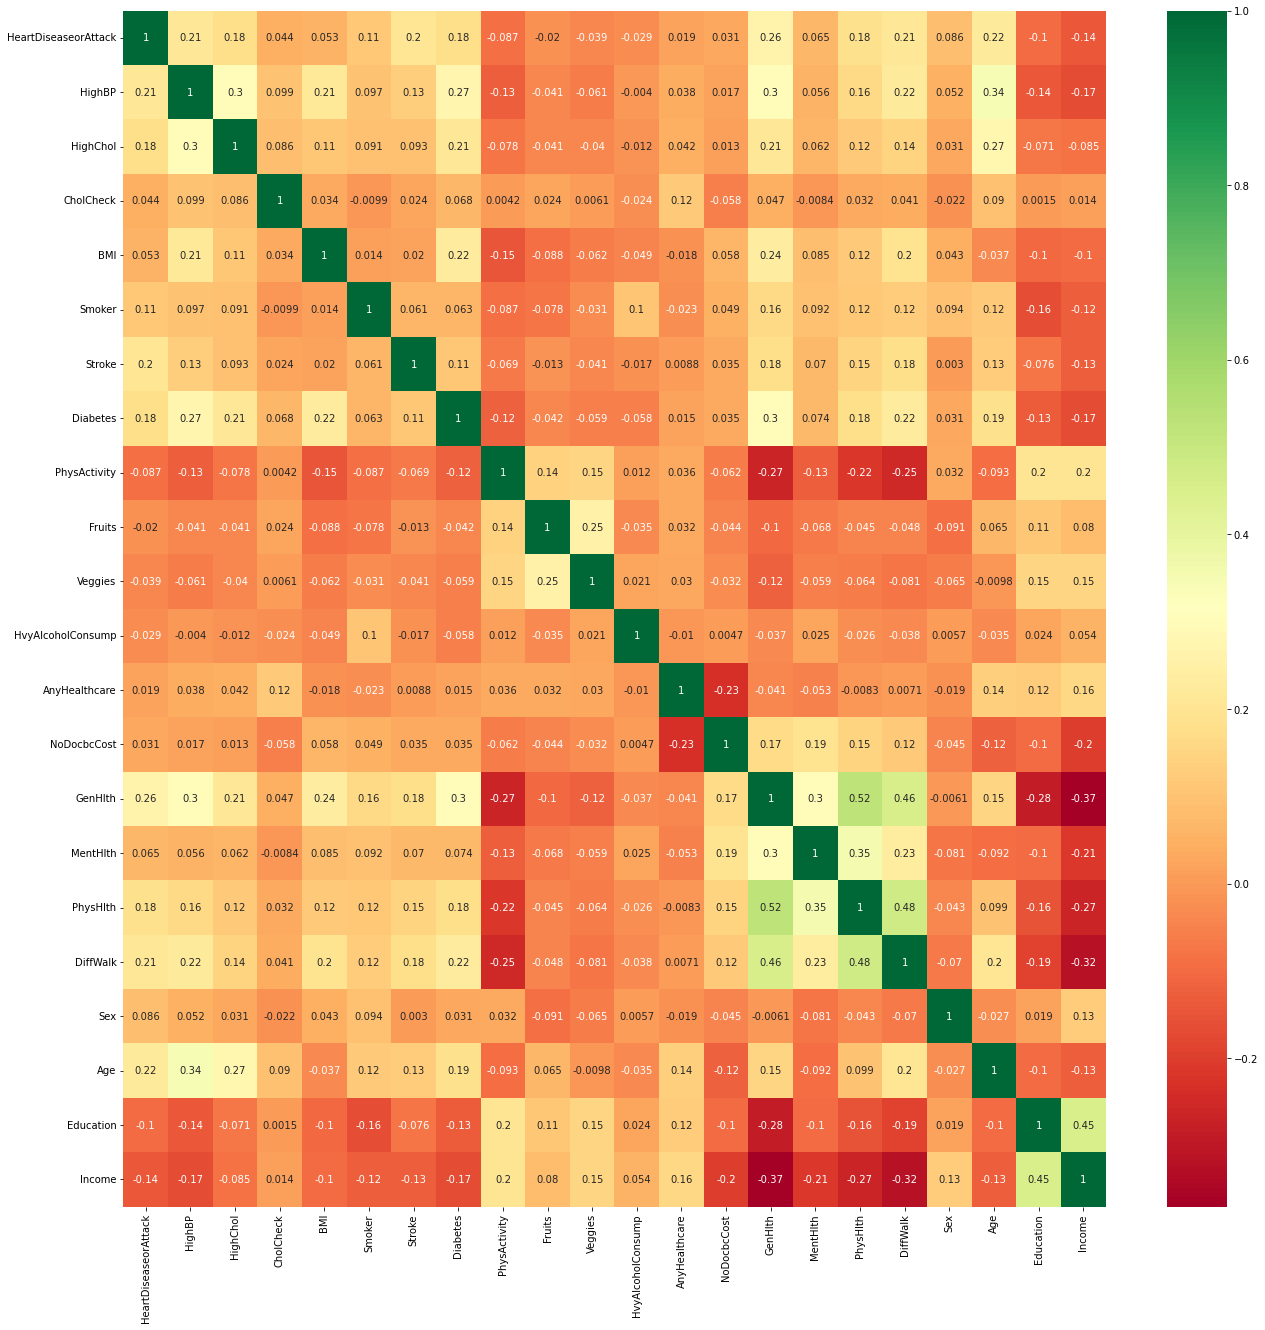

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

After performing the two feature selection techniques, we not only determined our most important independent variables but also confirmed them. 

As now we know which features are important, we can drop the rest of the features. 

In [12]:
df = df.drop(['CholCheck', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Education', 'Sex'], axis=1)

In [13]:
df

,HeartDiseaseorAttack,HighBP,HighChol,Stroke,Diabetes,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income
0,0.0,1.0,1.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,3.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,8.0
3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,7.0
253676,0.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,1.0,11.0,4.0
253677,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,1.0


In the lastest dataframe above, we have retained only the top 10 contributing features. 

Before splitting the dataset, lets check if the data is balanced or not

<AxesSubplot:xlabel='index', ylabel='HeartDiseaseorAttack'>

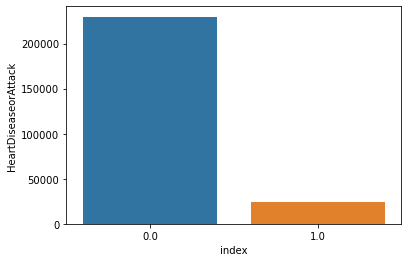

In [14]:
import matplotlib.pyplot as plt
baldf = pd.DataFrame()
baldf = df['HeartDiseaseorAttack'].value_counts().reset_index()
sns.barplot(data=baldf, x='index', y=baldf['HeartDiseaseorAttack'])


As we can that our dataset is highly imbalanced. 

It is extremely important to balance the dataset and improve the count of the minority class. Otherwise, it will be misleasding results, as our model will be trained only on the majority class.

As our dataset is not a huge one, we will conduct oversampling instead of undersampling. 

In oversampling, the sample counts of the minority class will be increased to match with the count of the majority class samples. 

In [15]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [16]:
X = df.iloc[:,1:11]
y = df.iloc[:,0]
X.shape


(253680, 10)

In [17]:
y.shape

(253680,)

By oversampling the minority class, now we have equal sample counts both the classes in the training set. This means that our model will be trained on equal number of samples of each class and there would not be any bias.  

Again splitting the upsampled dataset into X_train and y_train

https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation

In [23]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

Step 1: Split the data set into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=11)

Step 2: Create pipeline

In [26]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['scaler', MinMaxScaler()],['classifier', LogisticRegression(random_state=11,max_iter=1000)]])

Step 3: Create k-fold cross validation object

In [27]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)

Step 4: Impementing the grid

In [28]:
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [29]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)

Step 5: Fitting the grid

In [30]:
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_

In [31]:
test_score = grid_search.score(X_test, y_test)

In [32]:
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8335476976870447
Test score: 0.8319853161317591
